In [4]:
import numpy as np
from matplotlib import pyplot as plt
import os
import torch
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'notebook'
def plot_line(a, b):
    if (a.any()> 0 and b.any()>0): plt.plot([a[0], b[0]], [a[1], b[1]], 'k-')

def plot_skeleton(sample, pattern):
    for i in range(len(sample)//2):
        plt.plot(sample[i*2], sample[i*2+1], pattern)
    skeleton = sample.reshape(1, 32)
    Nose = skeleton[:,9*2:9*2+2][0]
    Neck = skeleton[:,8*2:8*2+2][0]
    Spine = skeleton[:,7*2:7*2+2][0]
    Bottom = skeleton[:,0*2:0*2+2][0]
    RShoulder = skeleton[:,10*2:10*2+2][0]
    RElbow = skeleton[:,11*2:11*2+2][0]
    RWrist = skeleton[:,12*2:12*2+2][0]
    LShoulder = skeleton[:,13*2:13*2+2][0]
    LElbow = skeleton[:,14*2:14*2+2][0]
    LWrist = skeleton[:,15*2:15*2+2][0]
    RHip = skeleton[:,4*2:4*2+2][0]
    RKnee = skeleton[:,5*2:5*2+2][0]
    RAnkle = skeleton[:,6*2:6*2+2][0]
    LHip = skeleton[:,1*2:1*2+2][0]
    LKnee = skeleton[:,2*2:2*2+2][0]
    LAnkle = skeleton[:,3*2:3*2+2][0]
    REye = skeleton[:,9*2:9*2+2][0]
    LEye = skeleton[:,9*2:9*2+2][0]
    REar = skeleton[:,9*2:9*2+2][0]
    LEar = skeleton[:,9*2:9*2+2][0]

    x_coordinates=skeleton[:,0::2][0]
    y_coordinates=skeleton[:,1::2][0]
    #Annotate each point with its index along the last dimension of the tensor
    for i, (x, y) in enumerate(zip(x_coordinates, y_coordinates)):
        plt.text(x, y, str(i), fontsize=10, ha='center', va='center')
    plot_line(Neck,Spine)
    plot_line(Spine,Bottom)
    plot_line(Bottom,LHip)
    plot_line(Bottom,RHip)
    plot_line(LEar, LEye)
    plot_line(LEye, Nose)
    plot_line(REar, REye)
    plot_line(REye, Nose)
    plot_line(Nose, Neck)
    plot_line(Neck, LShoulder)
    plot_line(LShoulder, LElbow)
    plot_line(LElbow, LWrist)
    plot_line(Neck, RShoulder)
    plot_line(RShoulder, RElbow)
    plot_line(RElbow, RWrist)
    plot_line(LHip, LKnee)
    plot_line(LKnee, LAnkle)
    plot_line(RHip, RKnee)
    plot_line(RKnee, RAnkle)


def transform_tensor(input_tensor):
    """Processes a PyTorch tensor for specific shape transformations.

    Args:
        input_tensor: The input PyTorch tensor.

    Returns:
        A NumPy array with the final shape (32,).
    """

    # Detach from CUDA if necessary
    if input_tensor.is_cuda:
        input_tensor = input_tensor.cpu().detach()

    # Assert expected input shape
    assert (input_tensor.shape == (1, 2, 1, 16)  or input_tensor.shape == (2, 1, 16)), "Input tensor must have shape (1, 2, 1, 16) or (2, 1, 16) "

    # Convert to NumPy array with the same shape
    numpy_array = input_tensor.numpy()

    # Reshape to (2, 16)
    numpy_array = numpy_array.reshape(2, 16)

    # Interleave coordinates to (32,)
    x_coordinates = numpy_array[0]
    y_coordinates = numpy_array[1]
    result = np.zeros(32, dtype=numpy_array.dtype)  # Ensures correct data type
    result[::2] = x_coordinates
    result[1::2] = y_coordinates

    return result 
def plot(sample,path,name): # this is for ploting 1 sample
    # e.g the real shape is: (1,32) ( 2 is x and y)  (coi nhu ta ko biet 32 di, cu coi nhu la sample.shape[1])
    # temp_sample=np.zeros((32,))
    # temp_sample[::2]=sample[0,:]
    # temp_sample[1::2]=sample[1,:]
    # sample=temp_sample

    sample = transform_tensor(sample)
    if sample.shape[0] == 32:
        sample_norm = sample.reshape(1,32)[0]
        # Plot normalized coordinates
        pad_nor = 0.2
        plt.title('Normalized skeleton')
        X_nor = sample_norm
        x_max = max(X_nor[0::2]) + pad_nor
        x_min = min(X_nor[0::2]) - pad_nor
        y_max = max(X_nor[1::2]) + pad_nor
        y_min = min(X_nor[1::2]) - pad_nor
        plt.xlim(x_min,x_max)
        plt.ylim(y_max, y_min)
        plot_skeleton(X_nor, 'ro')
        final_path=os.path.join(path,"{}.png".format(str(name)))
        plt.savefig(final_path)
        plt.close()
    else:
        print("sample is one-dimension array: (32,)")

0.0
(32,)


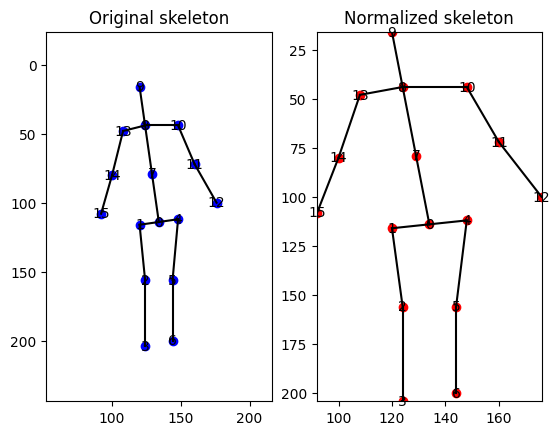

In [11]:
import pandas as pd
df = pd.read_csv("/home/edabk/cuong/human-pose-classifier/data/kp_16_cover_modes/cover2/traincover2.csv")
random_row = df.sample()
sample=random_row.values[0]
print(sample[-1])
sample=sample[:-1]
print(sample.shape)
if sample.shape[0] == 32:
    sample_norm = sample.reshape(1,32)[0]
    # Plot original coordinates
    pad_ori = 40
    plt.figure(str(sample))
    plt.subplot(121)
    plt.title('Original skeleton')
    X_ori = sample
    x_max = max(X_ori[0::2]) + pad_ori
    x_min = min(i for i in X_ori[0::2] if i > 0) - pad_ori
    y_max = max(X_ori[1::2]) + pad_ori
    y_min = min(j for j in X_ori[1::2] if j > 0) - pad_ori
    plt.xlim(x_min,x_max)
    plt.ylim(y_max, y_min)
    plot_skeleton(X_ori, 'bo')                                
    # Plot normalized coordinates
    pad_nor = 0.2
    #plt.figure(2)
    plt.subplot(122)
    plt.title('Normalized skeleton')
    X_nor = sample_norm
    x_max = max(X_nor[0::2]) + pad_nor
    x_min = min(X_nor[0::2]) - pad_nor
    y_max = max(X_nor[1::2]) + pad_nor
    y_min = min(X_nor[1::2]) - pad_nor
    plt.xlim(x_min,x_max)
    plt.ylim(y_max, y_min)
    plot_skeleton(X_nor, 'ro')
    plt.show()
else:
    print("sample is one-dimension array: (32,)")


In [1]:
import numpy as np
import torch
# from utils import norm_X
import numpy as np
def euclidean_dist(a, b):
    # This function calculates the euclidean distance between 2 point in 2-D coordinates
    # if one of two points is (0,0), dist = 0
    # a, b: input array with dimension: m, 2
    # m: number of samples
    # 2: x and y coordinate
    # print(a.shape)
    # print(b.shape)
    try:
        if (a.shape[1] == 2 and a.shape == b.shape):
            # check if element of a and b is (0,0)
            bol_a = (a[:,0] != 0).astype(int)
            bol_b = (b[:,0] != 0).astype(int)
            dist = np.linalg.norm(a-b, axis=1)
            # print("haha")
            return((dist*bol_a*bol_b).reshape(a.shape[0],1))
    except:
        print("[Error]: Check dimension of input vector")
        return 0
def norm_X(X):
    num_sample = X.shape[0]
    # Keypoints
    # print(X[0,:])
    Nose = X[:,9*2:9*2+2]
    Neck = X[:,8*2:8*2+2]
    RShoulder = X[:,10*2:10*2+2]
    RElbow = X[:,11*2:11*2+2]
    RWrist = X[:,12*2:12*2+2]
    LShoulder = X[:,13*2:13*2+2]
    LElbow = X[:,14*2:14*2+2]
    LWrist = X[:,15*2:15*2+2]
    RHip = X[:,4*2:4*2+2]
    RKnee = X[:,5*2:5*2+2]
    RAnkle = X[:,6*2:6*2+2]
    LHip = X[:,1*2:1*2+2]
    LKnee = X[:,2*2:2*2+2]
    LAnkle = X[:,3*2:3*2+2]
    # REye = X[:,14*2:14*2+2]
    # LEye = X[:,15*2:15*2+2]
    # REar = X[:,16*2:16*2+2]
    # LEar = X[:,17*2:17*2+2]
    REye = X[:,9*2:9*2+2]
    LEye = X[:,9*2:9*2+2]
    REar = X[:,9*2:9*2+2]
    LEar = X[:,9*2:9*2+2]

    # Length of head
    length_Neck_LEar = euclidean_dist(Neck, LEar)
    length_Neck_REar = euclidean_dist(Neck, REar)
    length_Neck_LEye = euclidean_dist(Neck, LEye)
    length_Neck_REye = euclidean_dist(Neck, REye)
    length_Nose_LEar = euclidean_dist(Nose, LEar)
    length_Nose_REar = euclidean_dist(Nose, REar)
    length_Nose_LEye = euclidean_dist(Nose, LEye)
    length_Nose_REye = euclidean_dist(Nose, REye)
    length_head      = np.maximum.reduce([length_Neck_LEar, length_Neck_REar, length_Neck_LEye, length_Neck_REye, \
                                 length_Nose_LEar, length_Nose_REar, length_Nose_LEye, length_Nose_REye])
    #length_head      = np.sqrt(np.square((LEye[:,0:1]+REye[:,0:1])/2 - Neck[:,0:1]) + np.square((LEye[:,1:2]+REye[:,1:2])/2 - Neck[:,1:2]))

    # Length of torso
    length_Neck_LHip = euclidean_dist(Neck, LHip)
    length_Neck_RHip = euclidean_dist(Neck, RHip)
    length_torso     = np.maximum(length_Neck_LHip, length_Neck_RHip)
    #length_torso     = np.sqrt(np.square(Neck[:,0:1]-(LHip[:,0:1]+RHip[:,0:1])/2) + np.square(Neck[:,1:2]-(LHip[:,1:2]+RHip[:,1:2])/2))

    # Length of right leg
    length_leg_right = euclidean_dist(RHip, RKnee) + euclidean_dist(RKnee, RAnkle)
    #length_leg_right = np.sqrt(np.square(RHip[:,0:1]-RKnee[:,0:1]) + np.square(RHip[:,1:2]-RKnee[:,1:2])) \
    #+ np.sqrt(np.square(RKnee[:,0:1]-RAnkle[:,0:1]) + np.square(RKnee[:,1:2]-RAnkle[:,1:2]))

    # Length of left leg
    length_leg_left = euclidean_dist(LHip, LKnee) + euclidean_dist(LKnee, LAnkle)
    #length_leg_left = np.sqrt(np.square(LHip[:,0:1]-LKnee[:,0:1]) + np.square(LHip[:,1:2]-LKnee[:,1:2])) \
    #+ np.sqrt(np.square(LKnee[:,0:1]-LAnkle[:,0:1]) + np.square(LKnee[:,1:2]-LAnkle[:,1:2]))

    # Length of leg
    length_leg = np.maximum(length_leg_right, length_leg_left)

    # Length of body
    length_body = length_head + length_torso + length_leg

    # Check all samples have length_body of 0
    length_chk = (length_body > 0).astype(int)

    # Check keypoints at origin
    keypoints_chk = (X > 0).astype(int)

    chk = length_chk * keypoints_chk

    # Set all length_body of 0 to 1 (to avoid division by 0)
    length_body[length_body == 0] = 1

    # The center of gravity
    # number of point OpenPose locates:
    # X.shape = (None,m,36) with 36 = 18 nodes * 2 and m samples
    # X[:, 0::2].shape = (None,m,18)
    # (X[:, 0::2] > 0).shape = (None,m,18) , but for each of the m rows , for each of the element in the row:
    # [1,2.2,3.1,0,2] -> [True,True,True,False,True]
    # [1,0,0,4,2]     -> [True,False,False,True,True]
    # Similarly for m rows
    num_pts = (X[:, 0::2] > 0).sum(1).reshape(num_sample,1) #(None,m,1) where each row represent the number of valid nodes that have x_coord > 0
    centr_x = X[:, 0::2].sum(1).reshape(num_sample,1) / num_pts
    centr_y = X[:, 1::2].sum(1).reshape(num_sample,1) / num_pts

    # The  coordinates  are  normalized relative to the length of the body and the center of gravity
    X_norm_x = (X[:, 0::2] - centr_x) / length_body
    X_norm_y = (X[:, 1::2] - centr_y) / length_body

    # Stack 1st element x and y together
    X_norm = np.column_stack((X_norm_x[:,:1], X_norm_y[:,:1]))

    for i in range(1, X.shape[1]//2):
        X_norm = np.column_stack((X_norm, X_norm_x[:,i:i+1], X_norm_y[:,i:i+1]))

    # Set all samples have length_body of 0 to origin (0, 0)
    X_norm = X_norm * chk

    return X_norm

/home/edabk/anaconda3/envs/Sleep/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.0
(32,)


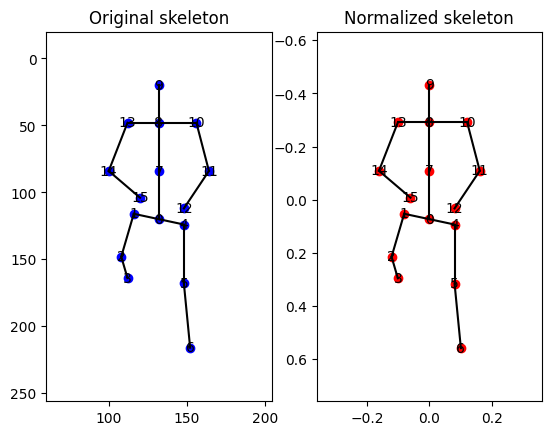

In [16]:
import pandas as pd
df = pd.read_csv("/home/edabk/cuong/human-pose-classifier/data/kp_16_cover_modes/cover2/traincover2.csv")
random_row = df.sample()
sample=random_row.values[0]
print(sample[-1])
sample=sample[:-1]
print(sample.shape)
if sample.shape[0] == 32:
    sample = sample.reshape(1,32)[0]
    sample_norm = norm_X(sample.reshape(1,32))
    sample_norm = sample_norm[0]
    # Plot original coordinates
    pad_ori = 40
    plt.figure(str(sample))
    plt.subplot(121)
    plt.title('Original skeleton')
    X_ori = sample
    x_max = max(X_ori[0::2]) + pad_ori
    x_min = min(i for i in X_ori[0::2] if i > 0) - pad_ori
    y_max = max(X_ori[1::2]) + pad_ori
    y_min = min(j for j in X_ori[1::2] if j > 0) - pad_ori
    plt.xlim(x_min,x_max)
    plt.ylim(y_max, y_min)
    plot_skeleton(X_ori, 'bo')                                
    # Plot normalized coordinates
    pad_nor = 0.2
    #plt.figure(2)
    plt.subplot(122)
    plt.title('Normalized skeleton')
    X_nor = sample_norm
    x_max = max(X_nor[0::2]) + pad_nor
    x_min = min(X_nor[0::2]) - pad_nor
    y_max = max(X_nor[1::2]) + pad_nor
    y_min = min(X_nor[1::2]) - pad_nor
    plt.xlim(x_min,x_max)
    plt.ylim(y_max, y_min)
    plot_skeleton(X_nor, 'ro')
    plt.show()
else:
    print("sample is one-dimension array: (32,)")
